##### We import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

##### Read data from file

In [2]:
df_demografia = pd.read_csv("adult.data.csv", sep = ",")

#### Data analysis

In [3]:
# We create a view of the dataframe
df_demografia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Let's see if we have null values
df_demografia.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
# How many of each race are represented in this dataset?
race_count = pd.DataFrame(df_demografia["race"].value_counts())
race_count.rename(columns = {"race": "values"}, inplace = True)
race_count.index.name = "race"
race_count

,values
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


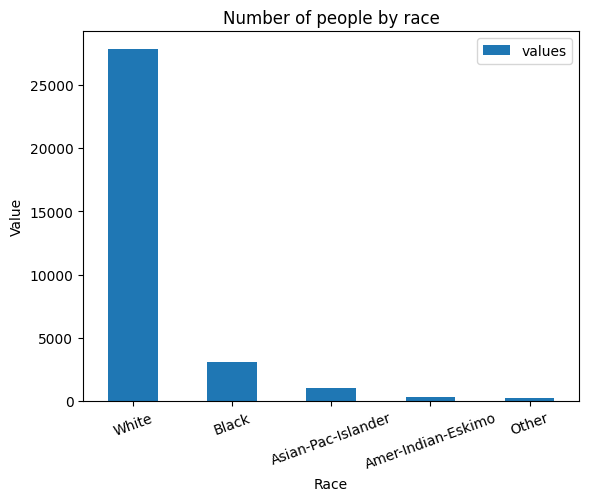

In [6]:
# We create a bar chart
grafic = race_count.plot.bar(rot = 20)
plt.title('Number of people by race')
plt.xlabel("Race")
plt.ylabel("Value")
plt.show()

In [7]:
# What is the average age of men?
average_age_men = df_demografia[df_demografia["sex"] == "Male"]["age"].mean().round(0)
average_age_men

39.0

In [8]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = (df_demografia[df_demografia["education"] == "Bachelors"]["education"].value_counts() * 100 / df_demografia.shape[0]).round(1)
percentage_bachelors

Bachelors    16.4
Name: education, dtype: float64

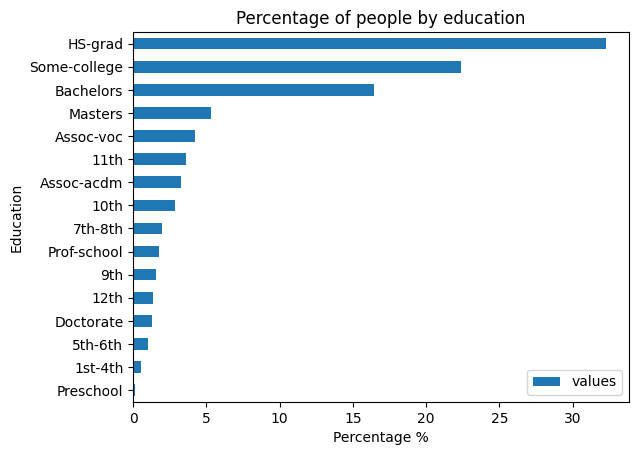

In [9]:
# We create a bar chart
porcen_education = pd.DataFrame(df_demografia.groupby(["education"]).size() * 100 / df_demografia.shape[0])
porcen_education.rename(columns = {0: "values"}, inplace = True)
porcen_education.sort_values('values', ascending= True, inplace= True)
grafic_porcen_education = porcen_education.plot.barh()
plt.xlabel("Percentage %")
plt.ylabel("Education")
plt.title('Percentage of people by education')
plt.show()

##### What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [10]:
# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df_demografia[(df_demografia["education"] == "Bachelors") | (df_demografia["education"] == "Masters") | (df_demografia["education"] == "Doctorate")]
higher_education

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [11]:
# percentage with salary >50K
higher_education_rich = (higher_education[higher_education["salary"] == ">50K"]["salary"].value_counts() * 100 / higher_education.shape[0]).round(1)
higher_education_rich

>50K    46.5
Name: salary, dtype: float64

##### What percentage of people without advanced education earn less than or equal to 50K?

In [12]:
# percentage with salary <= 50K
higher_education_rich = (higher_education[higher_education["salary"] == "<=50K"]["salary"].value_counts() * 100 / higher_education.shape[0]).round(1)
higher_education_rich

<=50K    53.5
Name: salary, dtype: float64

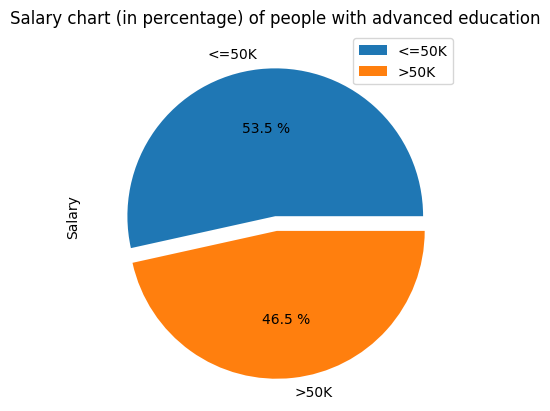

In [13]:
# We create a pie chart
higher_education_salary = pd.DataFrame(higher_education.groupby(["salary"]).size()) * 100 / higher_education.shape[0]
higher_education_salary.rename(columns = {0: "values"}, inplace = True)
higher_education_salary.plot.pie(y="values", autopct="%0.1f %%", explode= (0,0.1))
plt.ylabel("Salary")
plt.title('Salary chart (in percentage) of people with advanced education')
plt.show()

#### What is the minimum number of hours a person works per week (hours-per-week feature)?

In [14]:
min_work_hours = df_demografia["hours-per-week"].min()
min_work_hours

1

##### What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [15]:
# People who work a minimum of hours per week
num_min_workers = df_demografia[(df_demografia["hours-per-week"] == min_work_hours)]
num_min_workers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
1036,66,Self-emp-inc,150726,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
1262,69,?,195779,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5590,78,?,363134,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5632,45,?,189564,Masters,14,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5766,62,?,97231,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5808,76,?,211574,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
8447,67,?,244122,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
9147,75,?,260543,10th,6,Widowed,?,Other-relative,Asian-Pac-Islander,Female,0,0,1,China,<=50K
11451,27,Private,147951,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,1,United-States,<=50K


In [16]:
# Percentage of people with minimum hours worked per week earning >50K
rich_percentage = df_demografia[(df_demografia["hours-per-week"] == 1) & (df_demografia["salary"] == ">50K")]["hours-per-week"].count() * 100 / num_min_workers.shape[0]
rich_percentage

10.0

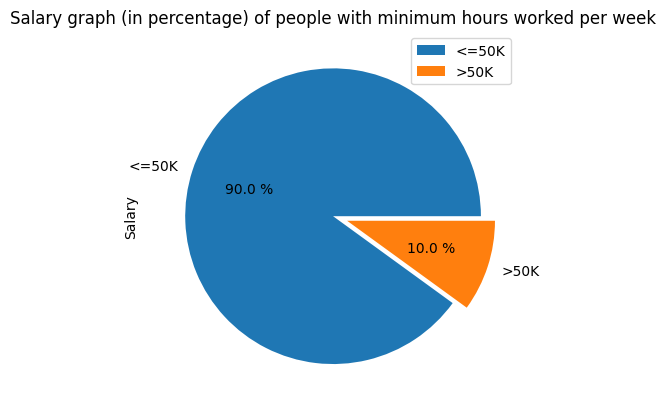

In [17]:
# We create a pie chart
people_minwork_salary = pd.DataFrame(num_min_workers.groupby(["salary"]).size())* 100 / num_min_workers.shape[0]
people_minwork_salary.rename(columns = {0: "values"}, inplace = True)
people_minwork_salary.plot.pie(y="values", autopct="%0.1f %%", explode= (0,0.1))
plt.ylabel("Salary")
plt.title('Salary graph (in percentage) of people with minimum hours worked per week')
plt.show()

##### What country has the highest percentage of people that earn >50K?

In [18]:
df_people_country = pd.DataFrame(df_demografia.groupby(["native-country"]).size())
df_people_country.rename(columns = {0: "number_people"}, inplace = True)
df_people_country.head(3)

,number_people
native-country,
?,583
Cambodia,19
Canada,121


In [19]:
# Countries with a number of people who have a salary of >50K and <=50K
df_people_country_salary = pd.DataFrame(df_demografia.groupby(["native-country","salary"],as_index=False).size())
df_people_country_salary.rename(columns = {"size": "number_people"}, inplace = True)
df_people_country_salary

,native-country,salary,number_people
0,?,<=50K,437
1,?,>50K,146
2,Cambodia,<=50K,12
3,Cambodia,>50K,7
4,Canada,<=50K,82
...,...,...,...
77,United-States,>50K,7171
78,Vietnam,<=50K,62
79,Vietnam,>50K,5
80,Yugoslavia,<=50K,10


In [20]:
# Let's pivot the previous dataframe
df_people_country_pivot= df_people_country_salary.pivot(index ='native-country', columns ='salary', values= ["number_people"])
df_people_country_pivot.columns = df_people_country_pivot.columns.droplevel(0)
df_people_country_pivot.head(5)

salary,<=50K,>50K
native-country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0


In [21]:
highest_earning_country = pd.DataFrame(df_people_country_pivot[">50K"] * (100 / df_people_country["number_people"]), columns= [">50K"])[">50K"].idxmax()
highest_earning_country

'Iran'

In [22]:
# Country with the highest percentage of people with a salary of >50K
df_highest_earning_country_percentage = pd.DataFrame(df_people_country_pivot[">50K"] * (100 / df_people_country["number_people"]), columns= [">50K"])
highest_earning_country = df_highest_earning_country_percentage[">50K"].idxmax()
highest_earning_country

'Iran'

In [23]:
# with a percentage of
highest_earning_country_percentage = df_highest_earning_country_percentage[">50K"].max()
highest_earning_country_percentage

41.86046511627907

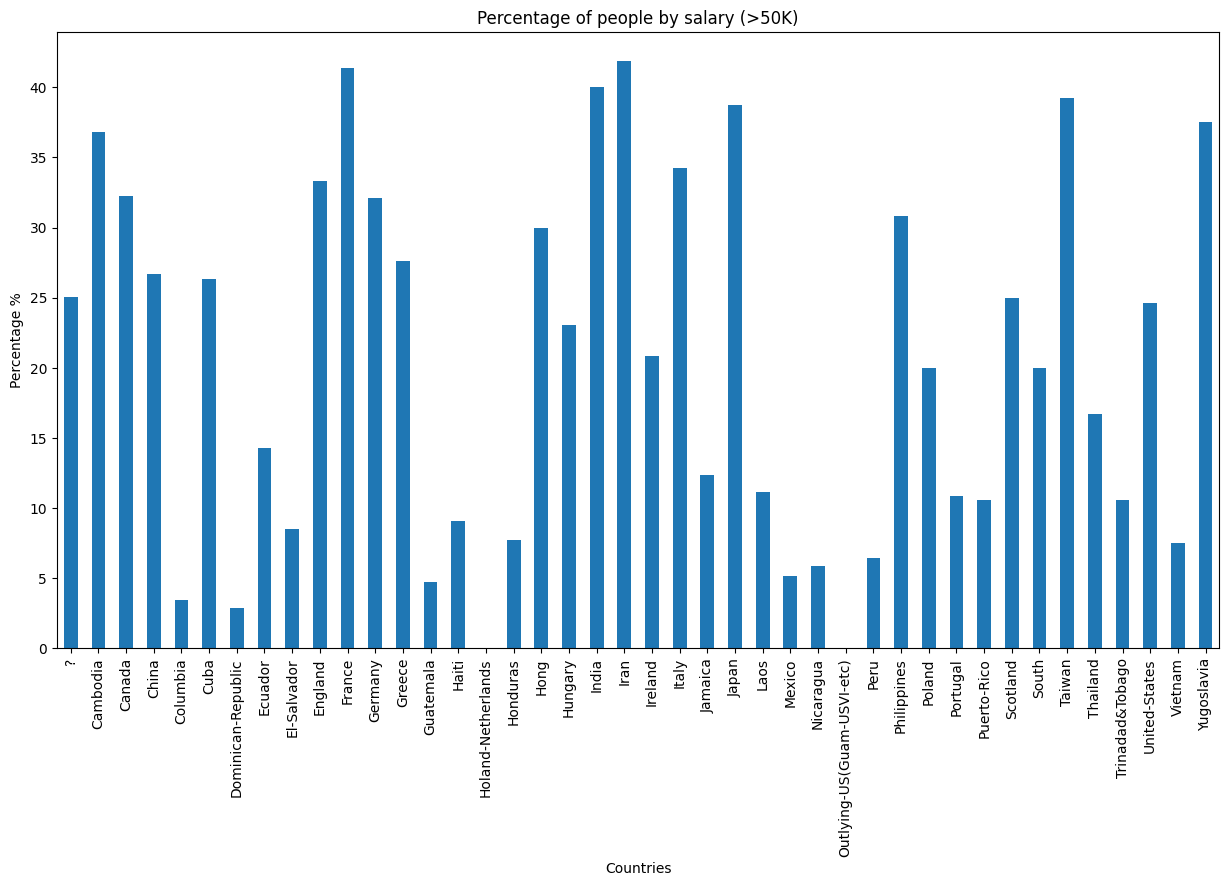

In [24]:
# We create a bar chart
grafic_porcen_education = df_highest_earning_country_percentage[">50K"].plot.bar(figsize=(15,8))
plt.xlabel("Countries")
plt.ylabel("Percentage %")
plt.title('Percentage of people by salary (>50K)')
plt.show()

In [25]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df_demografia[(df_demografia["salary"] == ">50K") & (df_demografia["native-country"] == "India")].groupby(["occupation"]).size().idxmax()
top_IN_occupation

'Prof-specialty'